In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [13]:
# define the initial system state (x, y, z positions in space)
initial_state = [1., 1., 1.]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho = np.arange(200, 10, -0.1)
beta = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 60
interval = 100
tspan = np.linspace(start_time, end_time, end_time * interval) 

In [14]:
# define the lorenz system
def lorenz_system(current_state, t, sigma, rho, beta):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    #if(dz_dt == 0):                  #does not work somewhat..
    #    temp = np.array([rho, z])
    #    res = np.append(res, temp.reshape(1, 2), axis=0)
    return [dx_dt, dy_dt, dz_dt]

In [15]:
# define the function to find local extrema points
def find_extrema(points, length, parameter, n, result):
    for i in range(length - 1):
        if points[i-1][n] < points[i][n] and points[i][n] > points[i+1][n]:
            temp = np.array([parameter, points[i][n]])
            result = np.append(result, temp.reshape(1, 2), axis=0)
        elif points[i-1][n] > points[i][n] and points[i][n] < points[i+1][n]:
            temp = np.array([parameter, points[i][n]])
            result = np.append(result, temp.reshape(1, 2), axis=0)
    return result

In [24]:
# define the function
def bifurcation_diagram(result, n):
    for r in range(len(rho)):
        
        if(r % 50 == 0):
            print("rho[", r, "]= ", rho[r])
        
        # get the points, by solving the system of equations
        points = odeint(lorenz_system, initial_state, tspan, args=(sigma, rho[r], beta))
        length = len(points)
        
        # save to the 'result' local extrema points
        result = find_extrema(points, length, rho[r], n, result)

        # save end value for next initial state
        initial_state[0], initial_state[1], initial_state[2] = points[:, 0][length - 1], points[:, 1][length - 1], points[:, 2][length - 1]
    
    return result

In [17]:
# define function for plotting
def plotting(res, ylabel):
    fig = plt.figure(figsize=(12, 9))
    plt.scatter(res[:, 0], res[:, 1], color="black", s=0.3, alpha=0.2, label='sigma= ' + str(sigma) + '\nbeta= ' + str(beta))
    plt.title("Lorenz system bifurcation diagram")
    plt.legend(loc='best')
    plt.xlabel('rho')
    plt.ylabel(ylabel)
    #plt.xlim(0, 200)
    #plt.ylim(0, 400)
    plt.grid()
    plt.show()

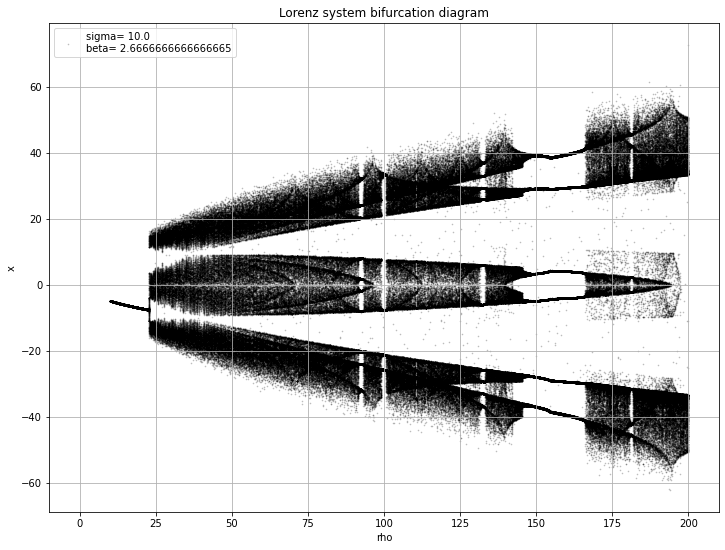

In [18]:
# define array to store results
res = np.array([[0, 0]])

# call the function
res = bifurcation_diagram(res, 0)     #n - ordinal number of the coordinate (x = 0, y = 1, z = 2)
plotting(res, 'x')

rho[ 0 ]=  200.0
rho[ 50 ]=  195.00000000000028
rho[ 100 ]=  190.00000000000057
rho[ 150 ]=  185.00000000000085
rho[ 200 ]=  180.00000000000114
rho[ 250 ]=  175.00000000000142
rho[ 300 ]=  170.0000000000017
rho[ 350 ]=  165.000000000002
rho[ 400 ]=  160.00000000000227
rho[ 450 ]=  155.00000000000256
rho[ 500 ]=  150.00000000000284
rho[ 550 ]=  145.00000000000313
rho[ 600 ]=  140.0000000000034
rho[ 650 ]=  135.0000000000037
rho[ 700 ]=  130.00000000000398
rho[ 750 ]=  125.00000000000426
rho[ 800 ]=  120.00000000000455
rho[ 850 ]=  115.00000000000483
rho[ 900 ]=  110.00000000000512
rho[ 950 ]=  105.0000000000054
rho[ 1000 ]=  100.00000000000568
rho[ 1050 ]=  95.00000000000597
rho[ 1100 ]=  90.00000000000625
rho[ 1150 ]=  85.00000000000654
rho[ 1200 ]=  80.00000000000682
rho[ 1250 ]=  75.0000000000071
rho[ 1300 ]=  70.00000000000739
rho[ 1350 ]=  65.00000000000767
rho[ 1400 ]=  60.00000000000796
rho[ 1450 ]=  55.00000000000824
rho[ 1500 ]=  50.00000000000853
rho[ 1550 ]=  45.0000000000088

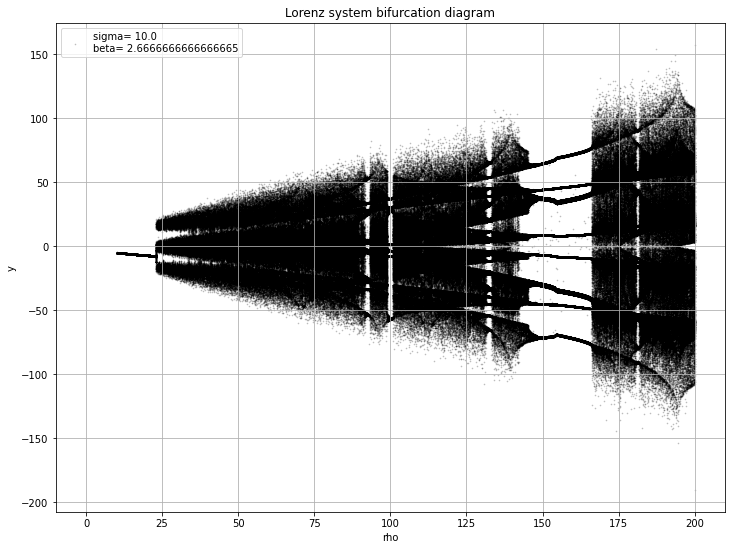

In [25]:
res = np.array([[0, 0]])
res = bifurcation_diagram(res, 1)
plotting(res, 'y')

rho[ 0 ]=  200.0
rho[ 50 ]=  195.00000000000028
rho[ 100 ]=  190.00000000000057
rho[ 150 ]=  185.00000000000085
rho[ 200 ]=  180.00000000000114
rho[ 250 ]=  175.00000000000142
rho[ 300 ]=  170.0000000000017
rho[ 350 ]=  165.000000000002
rho[ 400 ]=  160.00000000000227
rho[ 450 ]=  155.00000000000256
rho[ 500 ]=  150.00000000000284
rho[ 550 ]=  145.00000000000313
rho[ 600 ]=  140.0000000000034
rho[ 650 ]=  135.0000000000037
rho[ 700 ]=  130.00000000000398
rho[ 750 ]=  125.00000000000426
rho[ 800 ]=  120.00000000000455
rho[ 850 ]=  115.00000000000483
rho[ 900 ]=  110.00000000000512
rho[ 950 ]=  105.0000000000054
rho[ 1000 ]=  100.00000000000568
rho[ 1050 ]=  95.00000000000597
rho[ 1100 ]=  90.00000000000625
rho[ 1150 ]=  85.00000000000654
rho[ 1200 ]=  80.00000000000682
rho[ 1250 ]=  75.0000000000071
rho[ 1300 ]=  70.00000000000739
rho[ 1350 ]=  65.00000000000767
rho[ 1400 ]=  60.00000000000796
rho[ 1450 ]=  55.00000000000824
rho[ 1500 ]=  50.00000000000853
rho[ 1550 ]=  45.0000000000088

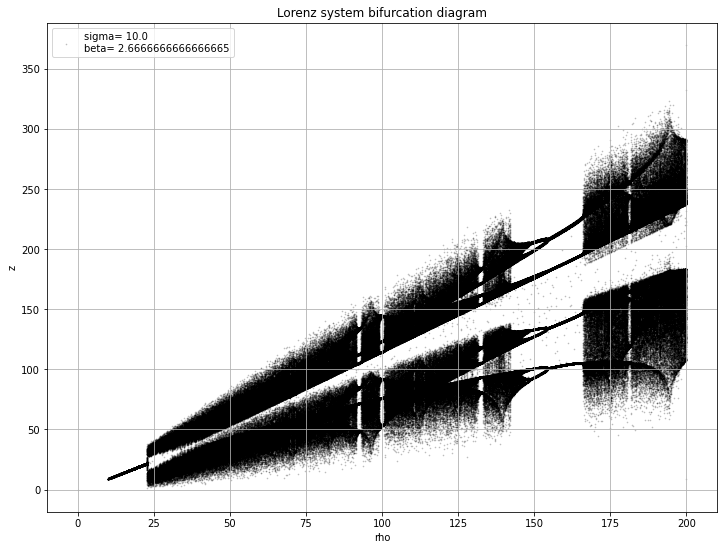

In [26]:
res = np.array([[0, 0]])
res = bifurcation_diagram(res, 2)
plotting(res, 'z')